In [191]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import warnings
warnings.simplefilter('ignore', UserWarning)

In [192]:
# read the data from ks-projects-201801.csv - 378,661 projects.
dataframe = pd.read_csv('ks-projects-201801.csv')

In [193]:
# show information and data types of the data attributes.
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [194]:
# show first 5 rows from the data frame.
dataframe.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [195]:
# projects state ratio
(dataframe['state'].value_counts()/len(dataframe))*100

failed        52.215306
successful    35.376234
canceled      10.241086
undefined      0.940683
live           0.739184
suspended      0.487507
Name: state, dtype: float64

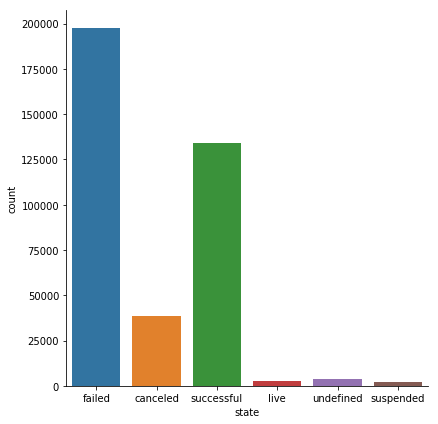

In [196]:
# plot state distribution.
sns.catplot('state',data=dataframe,kind='count', height=6)

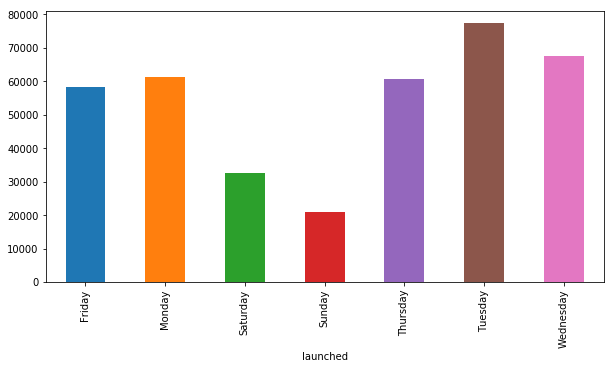

In [197]:
# num of launched projects per day of week 
dataframe.groupby([(pd.to_datetime(dataframe.launched).dt.strftime("%A"))]).size().plot(kind='bar',figsize=(10,5))

In [198]:
# total projects per year
dataframe.groupby([(pd.to_datetime(dataframe.launched).dt.year)]).size()

launched
1970        7
2009     1329
2010    10519
2011    26237
2012    41165
2013    44851
2014    67745
2015    77300
2016    57184
2017    52200
2018      124
dtype: int64

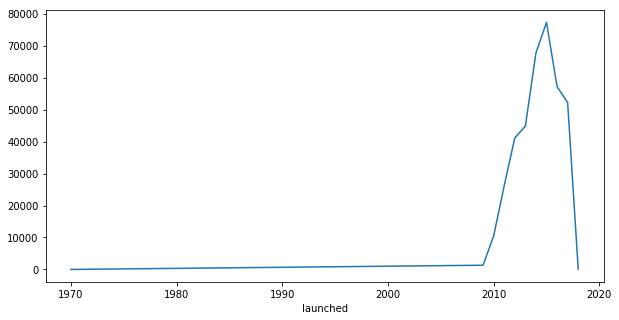

In [199]:
dataframe.groupby([(pd.to_datetime(dataframe.launched).dt.year)]).size().plot(figsize=(10,5))

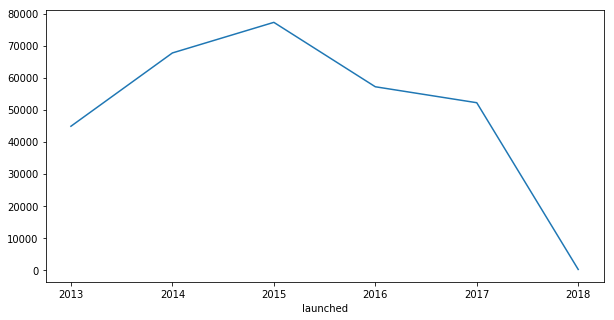

In [200]:
# i will reduce datapoints to get more clean data
start_date = '2013-01-01'
dataframe = dataframe[dataframe['launched'] >= start_date]
dataframe.groupby([(pd.to_datetime(dataframe.launched).dt.year)]).size().plot(figsize=(10,5))

In [201]:
# average pledged amount in USD
round(dataframe['usd_pledged_real'].mean())

9926.0

In [202]:
# average backers
int(dataframe['backers'].mean())

112

In [203]:
# average projects goal in usd
round(dataframe['usd_goal_real'].mean())

53155.0

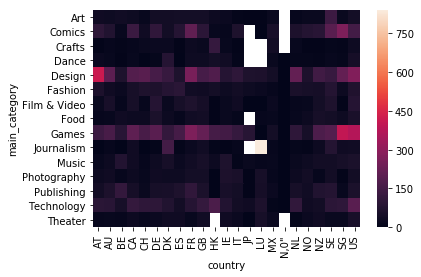

In [204]:
# heat map of average backers by country and main_category
pivot_table = dataframe.pivot_table(index='main_category', 
                   columns='country', 
                   values='backers', 
                   aggfunc='mean')
sns.heatmap(pivot_table)

In [205]:
# for the prediction purpose, i will filter the data
# to have only successful and failed projects.
dataframe = dataframe.loc[dataframe['state'].isin(['successful', 'failed'])]

In [206]:
# projects main category ratio
(dataframe['main_category'].value_counts()/len(dataframe))*100

Film & Video    14.267193
Music           11.126592
Publishing      10.715585
Technology       9.934208
Games            9.722125
Design           8.777429
Food             7.549054
Art              7.472812
Fashion          6.801347
Comics           3.088742
Crafts           2.844150
Photography      2.834088
Theater          2.525253
Journalism       1.368087
Dance            0.973335
Name: main_category, dtype: float64

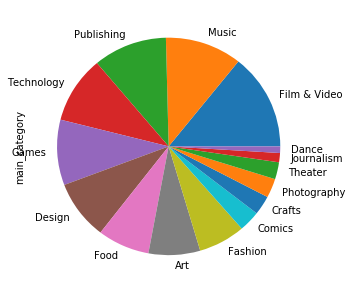

In [207]:
# plot main category ratio distibution
(dataframe['main_category'].value_counts()/len(dataframe)).plot.pie(y='mass', figsize=(5, 5))

In [208]:
# count projects by country
dataframe['country'].value_counts()

US      188632
GB       28897
CA       12370
AU        6616
DE        3436
FR        2520
NL        2411
IT        2369
ES        1873
SE        1509
MX        1411
NZ        1274
DK         926
IE         683
CH         652
NO         582
BE         523
AT         485
HK         477
SG         454
N,0"       210
LU          57
JP          23
Name: country, dtype: int64

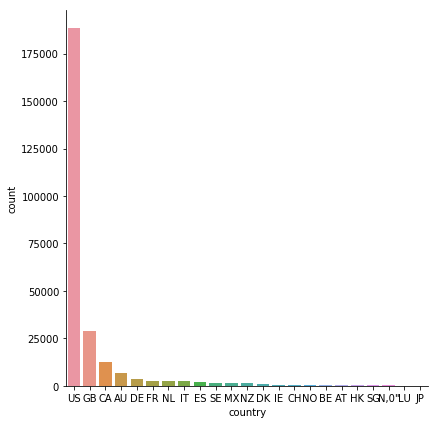

In [209]:
# plot country distribution
sns.catplot('country',data=dataframe, order = dataframe['country'].value_counts().index,kind='count', height=6,)

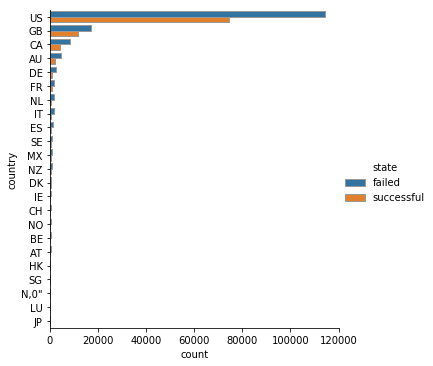

In [210]:
# now country/state distribution.
sns.catplot(y="country", hue="state", kind="count",edgecolor=".6", data=dataframe, order = dataframe['country'].value_counts().index);

In [211]:
# checking which columns has null values
dataframe.isnull().sum()

ID                    0
name                  0
category              0
main_category         0
currency              0
deadline              0
goal                  0
launched              0
pledged               0
state                 0
backers               0
country               0
usd pledged         210
usd_pledged_real      0
usd_goal_real         0
dtype: int64

In [212]:
# we can see that usd_pledged are the only column that has null values
# we will drop this column and so all columns that is known just after project is launched like
# pledged, backers, usd_pledged_real
# name, ID also are not influcing the machine learning process , so i will delete it as well.
dataframe = dataframe.drop(['ID', 'name', 'usd pledged', 'pledged', 'backers', 'usd_pledged_real'], axis=1)

In [213]:
# the dataframe now 
dataframe.head()

,category,main_category,currency,deadline,goal,launched,state,country,usd_goal_real
0,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,failed,GB,1533.95
1,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,failed,US,30000.00
2,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,failed,US,45000.00
5,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,successful,US,50000.00
6,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,successful,US,1000.00


In [214]:
# encode string values to integers for the macheine learning purpose
countryTransformer = preprocessing.LabelEncoder()
currencyTransformer = preprocessing.LabelEncoder()
main_categoryTransformer = preprocessing.LabelEncoder()
categoryTransformer = preprocessing.LabelEncoder()
dataframe['country'] = countryTransformer.fit_transform(dataframe['country'])
dataframe['currency'] = currencyTransformer.fit_transform(dataframe['currency'])
dataframe['main_category'] = main_categoryTransformer.fit_transform(dataframe['main_category'])
dataframe['category'] = categoryTransformer.fit_transform(dataframe['category'])


In [215]:
# convert dates to Unix time in nano seconds
dataframe["launched"] = pd.to_datetime(dataframe["launched"])
dataframe["deadline"] = pd.to_datetime(dataframe["deadline"])
dataframe["deadline"] =  dataframe.deadline.values.astype(np.int64)
dataframe["launched"] =  dataframe.launched.values.astype(np.int64)
# and now i will add a new feature based on deadline and launched
# project_length will be deadline - launched
dataframe["project_length"] = dataframe["deadline"] - dataframe["launched"]

In [216]:
# and now there is no need for deadline and launched
dataframe = dataframe.drop(['deadline', 'launched'], axis=1)

In [217]:
dataframe.head()

,category,main_category,currency,goal,state,country,usd_goal_real,project_length
0,108,12,5,1000.0,failed,9,1533.95,5053652000000000
1,93,6,13,30000.0,failed,22,30000.00,5166963000000000
2,93,6,13,45000.0,failed,22,45000.00,3886750000000000
5,123,7,13,50000.0,successful,22,50000.00,2974893000000000
6,58,7,13,1000.0,successful,22,1000.00,1661356000000000


In [218]:
# X is the dataframe without the state column
X = dataframe.drop('state', axis=1)
# Y is the state column
Y = dataframe['state']

In [219]:
# here we are splitting the data into 80% and 20%
# 80% is for the model training X_train, Y_train
# 20% is for the model testing X_test, Y_test
# we will predict the state of X_test and compare it to the real data Y_test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [220]:
# now let us check multiplue classification machine learning models


# prepare models
classifiers = [
    DecisionTreeClassifier(),
    GradientBoostingClassifier(),
    KNeighborsClassifier(),
    RandomForestClassifier(),
    GaussianNB()
]

# evaluate one by one to check who is the most accuracte 
for clf in classifiers:
    clf.fit(X_train, Y_train)
    
    print("="*30)
    print(clf.__class__.__name__)    
    
    prediction = clf.predict(X_test)
    acc = accuracy_score(Y_test, prediction)
    
    print("Accuracy: {:.2%}".format(acc))

print("="*30)
print('Finish')

DecisionTreeClassifier
Accuracy: 61.44%
GradientBoostingClassifier
Accuracy: 68.73%
KNeighborsClassifier
Accuracy: 59.40%
RandomForestClassifier
Accuracy: 65.56%
GaussianNB
Accuracy: 61.84%
Finish


In [221]:
# we can see that GradientBoostingClassifier is the most accurist model
# so lets perform fine tuning on the learning_rate attribute of the model
learning_rates = [1, 0.7, 0.5, 0.25, 0.1, 0.01]
for lrn in learning_rates:
    clf = GradientBoostingClassifier(learning_rate=lrn)
    clf.fit(X_train, Y_train)
    print("="*30)
    print(lrn)
    prediction = clf.predict(X_test)
    acc = accuracy_score(Y_test, prediction)
    print("Accuracy: {:.2%}".format(acc))
    
print("="*30)
print('Finish')

1
Accuracy: 70.27%
0.7
Accuracy: 70.27%
0.5
Accuracy: 70.17%
0.25
Accuracy: 69.83%
0.1
Accuracy: 68.73%
0.01
Accuracy: 63.24%
Finish


In [222]:
# we will use the best performance learning rate
# in fact, we can get more accuracy if we have more informative data features.
 
clf = GradientBoostingClassifier(learning_rate=0.7)
clf.fit(X_train, Y_train)
print('****Results****')
prediction = clf.predict(X_test)
acc = accuracy_score(Y_test, prediction)
print("Accuracy: {:.2%}".format(acc))

****Results****
Accuracy: 70.27%


In [223]:
# comparing prediction to true data
np.column_stack((prediction,Y_test))

array([['failed', 'successful'],
       ['failed', 'failed'],
       ['failed', 'failed'],
       ...,
       ['successful', 'successful'],
       ['successful', 'failed'],
       ['successful', 'successful']], dtype=object)

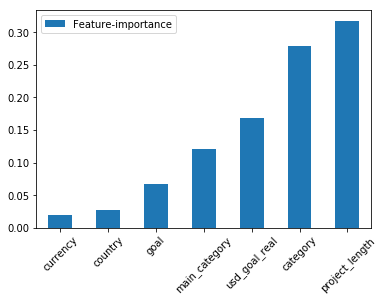

In [224]:
# let us see the feature importance order of the predition model.
feats = {}
for feature, importance in zip(X_train.columns, clf.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Feature-importance'})
importances.sort_values(by='Feature-importance').plot(kind='bar', rot=45)

In [233]:
futureData = pd.DataFrame(columns=['category', 'main_category', 'currency', 'deadline', 'goal', 'launched', 'country', 'usd_goal_real'])
futureData.loc[0] = ['Restaurants', 'Food', 'USD', '2019-07-30', '60000.0', '2019-04-01 12:00:00','US', '60000.00']

In [234]:
futureData.head()

,category,main_category,currency,deadline,goal,launched,country,usd_goal_real
0,Restaurants,Food,USD,2019-07-30,60000.0,2019-04-01 12:00:00,US,60000.00


In [235]:
futureData['country'] = countryTransformer.transform(futureData['country'])
futureData['currency'] = currencyTransformer.transform(futureData['currency'])
futureData['main_category'] = main_categoryTransformer.transform(futureData['main_category'])
futureData['category'] = categoryTransformer.transform(futureData['category'])

In [237]:
futureData["launched"] = pd.to_datetime(futureData["launched"])
futureData["deadline"] = pd.to_datetime(futureData["deadline"])
futureData["deadline"] =  futureData.deadline.values.astype(np.int64)
futureData["launched"] =  futureData.launched.values.astype(np.int64)

In [238]:
futureData["project_length"] = futureData["deadline"] - futureData["launched"]
futureData = futureData.drop(['deadline', 'launched'], axis=1)

In [239]:
futureData.head()

,category,main_category,currency,goal,country,usd_goal_real,project_length
0,123,7,13,60000.0,22,60000.00,10324800000000000


In [240]:
prediction = clf.predict(futureData)

In [241]:
prediction

array(['successful'], dtype=object)